In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [180]:
from __future__ import division
import os, sys
from IPython.display import Image as imdisplay

from Calibration_SW.focustest import *

In [3]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'

# Field 2 05/52





      START IMAGE ANALYSIS 




reading parameters...
centre = None
date given :  25
To extract the sources: fwhm = [12.5, 15, 17], threshold = [15]
reading parameters...
Computing predicted location for science mask
Location of the sources predicted
Detection algorith is used without 66% ellipticity
fwhm = 12.5, T = 15, len = 154
Detection algorith is used without 66% ellipticity
fwhm = 15, T = 15, len = 171
Detection algorith is used without 66% ellipticity
fwhm = 17, T = 15, len = 170
Filtering out sources with peak flux below 200
Number of sources detected:  141
We fit the profile by the convolution of a box by a gaussian
Fitting in spectral direction
Fitting in spatial direction


<IPython.core.display.Javascript object>


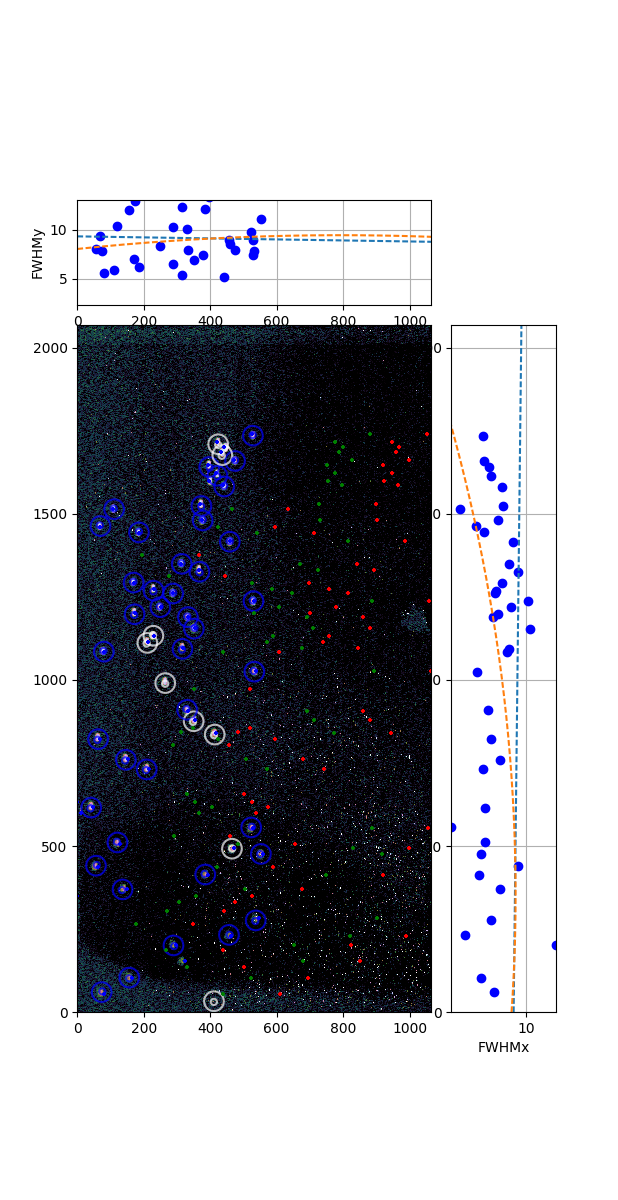

Table saved on:  /data/FireBall/FTS-06-2018/DetectorShim-20180525/image-303-322-Field2-stack_table.csv


In [139]:
from Calibration_SW.focustest import *
filename = '/data/FireBall/FTS-06-2018/DetectorShim-20180525/image-303-322-Field2-stack.fits'
F2mask = Focus(filename = filename, quick=False, figsize=12, windowing=True, reversex=True, date=25, mask='F2', cloudpath=cloudpath,
              threshold=[15], fwhm=[12.5,15,17], peak_threshold=200, sources='slits')

<IPython.core.display.Javascript object>


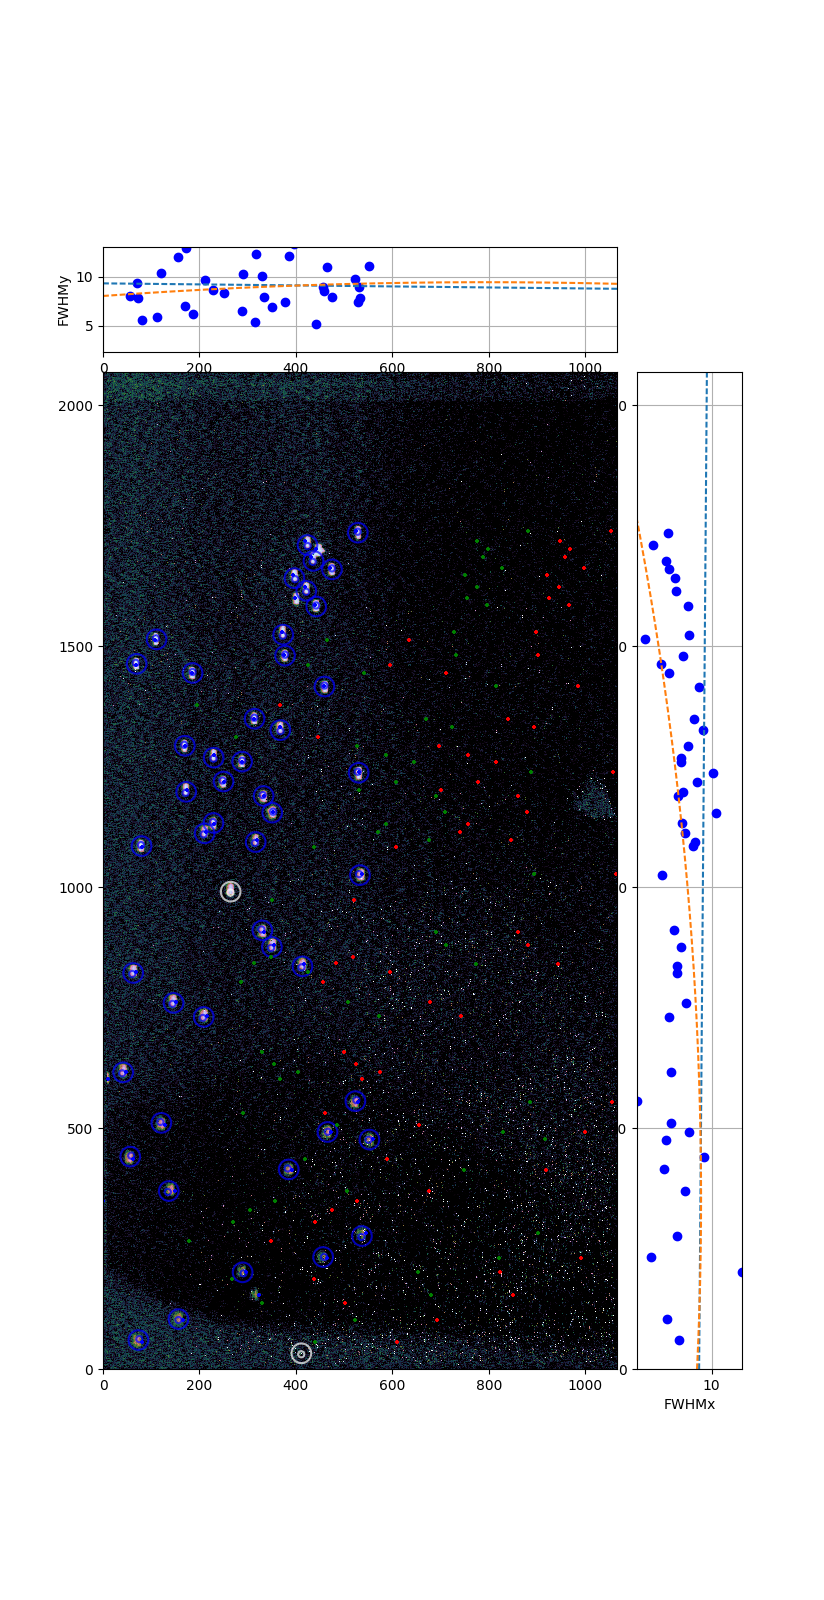

In [141]:
F2mask.AsignWave2Spot(dist_min=20, dist_max=15)
F2mask.plot_FWHM_det()

<IPython.core.display.Javascript object>


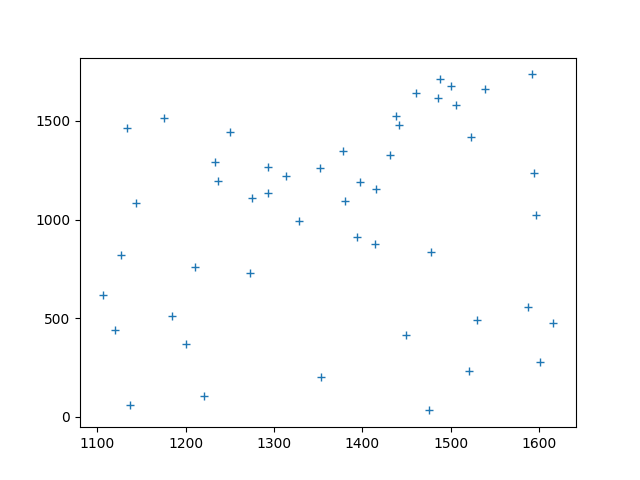

In [142]:
plt.figure()
plt.plot(F2mask.table['X_IMAGE'], F2mask.table['Y_IMAGE'],'+')
bad = (F2mask.table['FWHMx'] == 0) | (F2mask.table['FWHMy'] == 0)
plt.plot(F2mask.table[bad]['X_IMAGE'], F2mask.table[bad]['Y_IMAGE'],'r+')


<IPython.core.display.Javascript object>


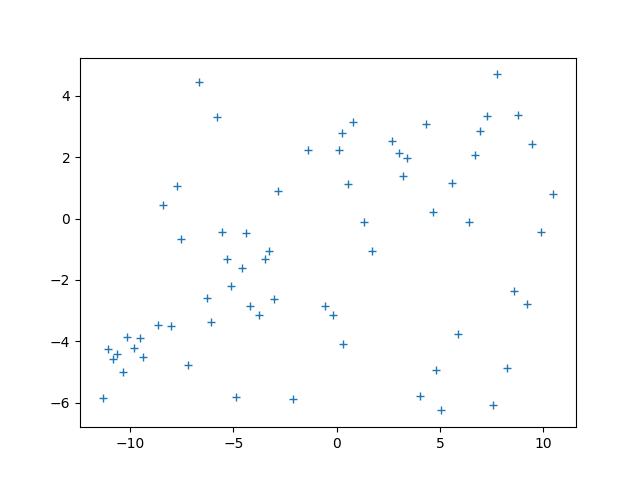

In [157]:
plt.figure()
plt.plot(F2mask.xmask, F2mask.ymask,'+')

not enough spots at wavelength: 0.20261371
not enough spots at wavelength: 0.20626604
at wavelength: 0.21392365
maximum residual along x, y (in pixels): 4.07859105939, 4.89691791847


<IPython.core.display.Javascript object>


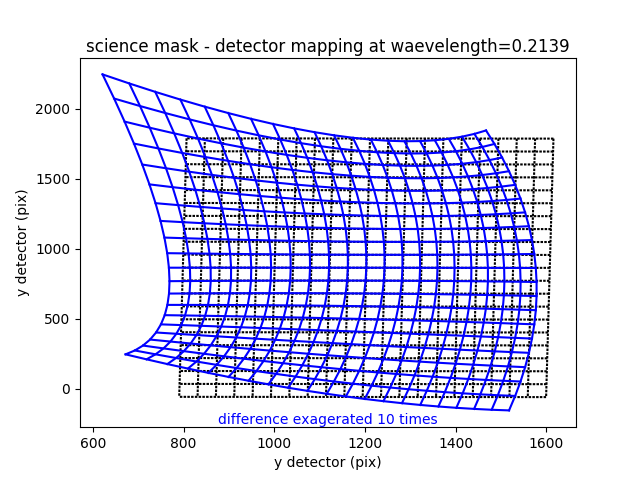

In [143]:
F2mask.map_mask_detector(deg=[2,2])
F2mask.plot_mapping()

In [154]:
print(map_coeffs[2,0,0,:])
map_coeffs = F2mask.mapping
dxdet_dxmask = map_coeffs[:,1,0,0]
dxdet_dymask = map_coeffs[:,0,1,0]
dydet_dxmask = map_coeffs[:,1,0,1]
dydet_dymask = map_coeffs[:,0,1,1]
J  = np.array([[dxdet_dxmask, dxdet_dymask],[dydet_dxmask, dydet_dymask]])
# convert det pix in mm
J *= 13*1E-3
print(J[...,0])
print(J[...,1])
print(J[...,2])

[ 1203.10780968   864.82484686]
[[ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]]
[[-0.00877694 -0.87648054]
 [-0.99930037  0.0020158 ]]


# Tilted Mask 05/25





      START IMAGE ANALYSIS 




reading parameters...
centre = None
To extract the sources: fwhm = [12.5, 15, 17], threshold = [10]
Detection algorith is used without 66% ellipticity
fwhm = 12.5, T = 10, len = 221
Detection algorith is used without 66% ellipticity
fwhm = 15, T = 10, len = 237
Detection algorith is used without 66% ellipticity
fwhm = 17, T = 10, len = 219
Filtering out sources with peak flux below 200
Number of sources detected:  209
We fit the profile by the convolution of a box by a gaussian
Fitting in spectral direction
Fitting in spatial direction


<IPython.core.display.Javascript object>


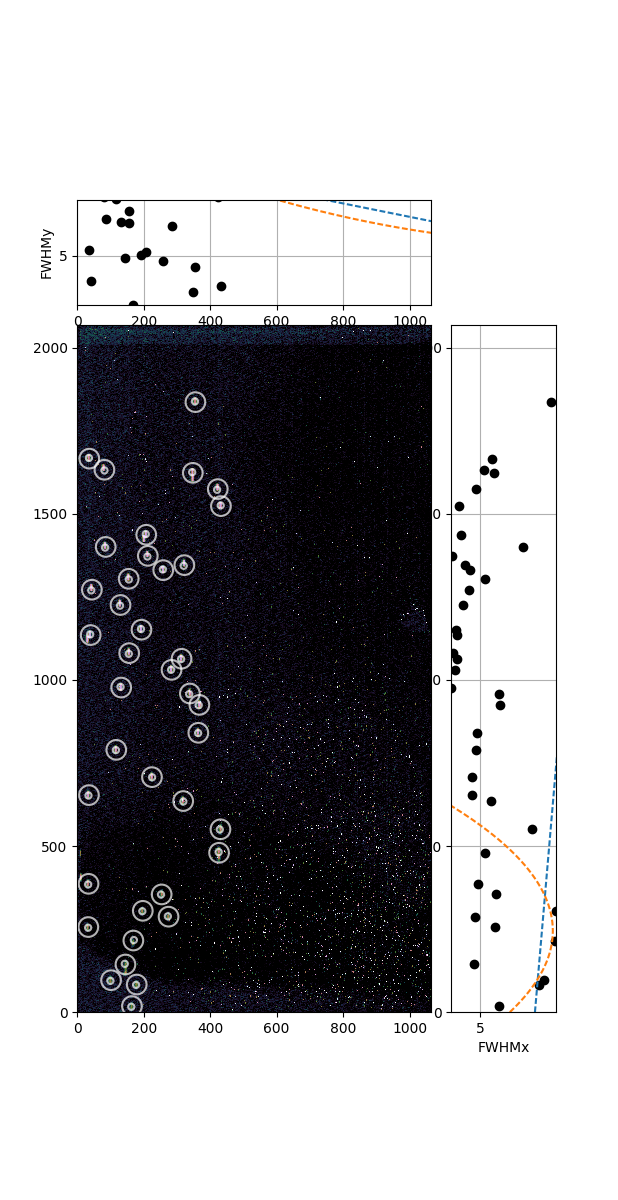

No windowing
Table saved on:  /data/FireBall/FTS-06-2018/DetectorShim-20180525/image-403-422-tilted-stack_table.csv


In [145]:
filename = '/data/FireBall/FTS-06-2018/DetectorShim-20180525/image-403-422-tilted-stack.fits'
Tiltedmask = Focus(filename = filename, quick=False, figsize=12, reversex=True, date=25, mask='F2', cloudpath=cloudpath,
              threshold=[10], fwhm=[12.5,15,17], peak_threshold=200, sources='slits')

### reverse map to get x,y tilted mask coords 

<IPython.core.display.Javascript object>


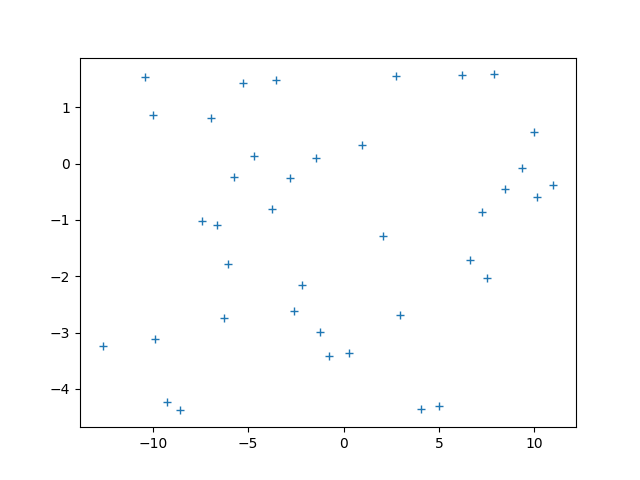

In [164]:
Tiltedmask.xmask = - (Tiltedmask.table['Y_IMAGE'] -  864.82484686 )*13*1E-3  
Tiltedmask.ymask = - (Tiltedmask.table['X_IMAGE'] - 1203.10780968)/0.87*13*1E-3
plt.figure()
plt.plot(Tiltedmask.xmask, Tiltedmask.ymask,'+')

In [168]:
#t = Table([Tiltedmask.xmask, Tiltedmask.ymask], names=['xmm', 'ymm'])
#t.write(cloudpath + '/TestsFTS2018/AIT-Optical-FTS-201805/AIT-MASKS-2018/targets_tilted.txt',format='ascii')





      START IMAGE ANALYSIS 




reading parameters...
centre = None
date given :  25
To extract the sources: fwhm = [12.5, 15, 17], threshold = [15]
reading parameters...
Computing predicted location for science mask
Location of the sources predicted
Detection algorith is used without 66% ellipticity
fwhm = 12.5, T = 15, len = 150
Detection algorith is used without 66% ellipticity
fwhm = 15, T = 15, len = 165
Detection algorith is used without 66% ellipticity
fwhm = 17, T = 15, len = 145
Filtering out sources with peak flux below 200
Number of sources detected:  152
We fit the profile by the convolution of a box by a gaussian
Fitting in spectral direction
Fitting in spatial direction


<IPython.core.display.Javascript object>


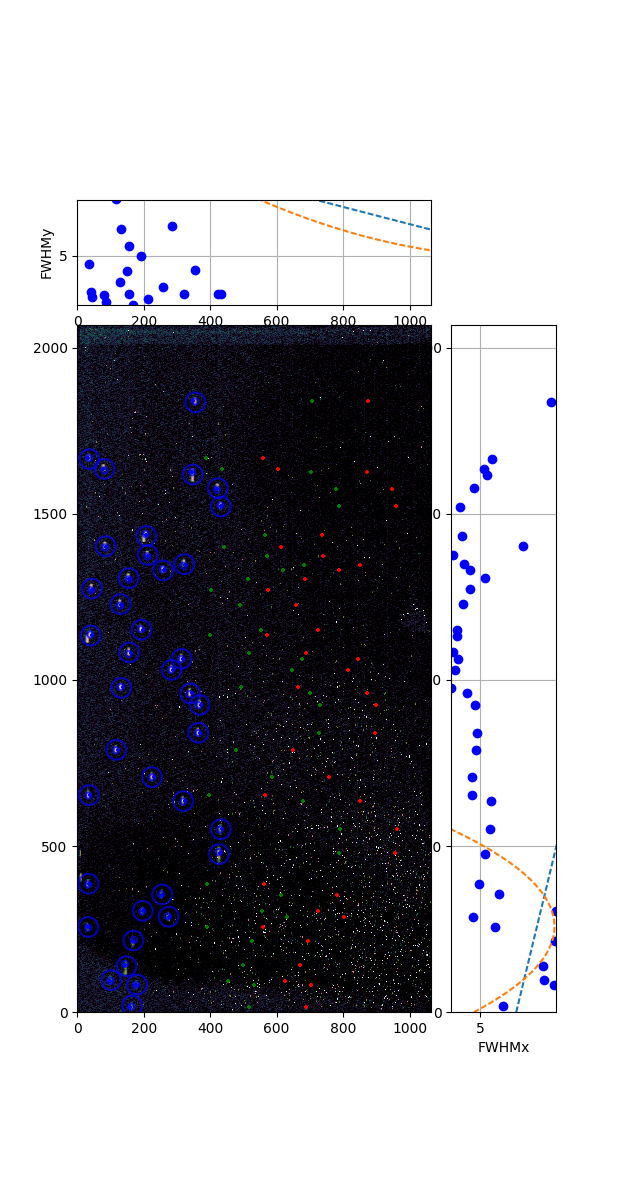

Table saved on:  /data/FireBall/FTS-06-2018/DetectorShim-20180525/image-403-422-tilted-stack_table.csv


In [170]:
from Calibration_SW.focustest import *
Tiltedmask = Focus(filename = filename, quick=False, figsize=12, reversex=True, date=25, windowing=True, mask='tilted', 
                   cloudpath=cloudpath, threshold=[15], fwhm=[12.5,15,17], peak_threshold=200, sources='slits')

not enough spots at wavelength: 0.20261371
not enough spots at wavelength: 0.20626604
at wavelength: 0.21392365
maximum residual along x, y (in pixels): 2.4116885409, 4.71294759958


<IPython.core.display.Javascript object>


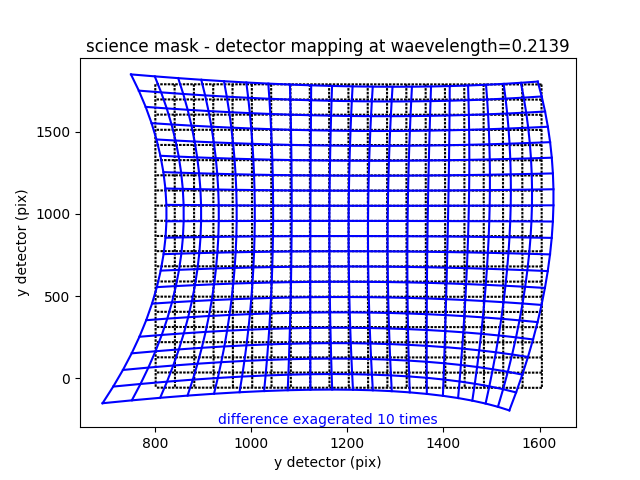

In [175]:
Tiltedmask.map_mask_detector(deg=[2,2])
Tiltedmask.plot_mapping()

In [176]:
map_coeffs = Tiltedmask.mapping
print(map_coeffs[2,0,0,:])
map_coeffs = F2mask.mapping
dxdet_dxmask = map_coeffs[:,1,0,0]
dxdet_dymask = map_coeffs[:,0,1,0]
dydet_dxmask = map_coeffs[:,1,0,1]
dydet_dymask = map_coeffs[:,0,1,1]
J  = np.array([[dxdet_dxmask, dxdet_dymask],[dydet_dxmask, dydet_dymask]])
# convert det pix in mm
J *= 13*1E-3
print(J[...,0])
print(J[...,1])
print(J[...,2])

[ 1203.05349838   865.51549192]
[[ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]]
[[-0.00877694 -0.87648054]
 [-0.99930037  0.0020158 ]]


Not enough spots at wavelength 0.20261371
Not enough spots at wavelength 0.20626604

        detector focus fitted at wavelength 0.21392365:
              offset: -1.12073022317  +-0.663659373132
              xslope: 7.58107340306  +-3.94590736769
              yslope: 0.0  +-0.0
              a: 11.6550294352  +-4.43869070361
              b: 6.68654969534  +-1.12294110192
              


<IPython.core.display.Javascript object>


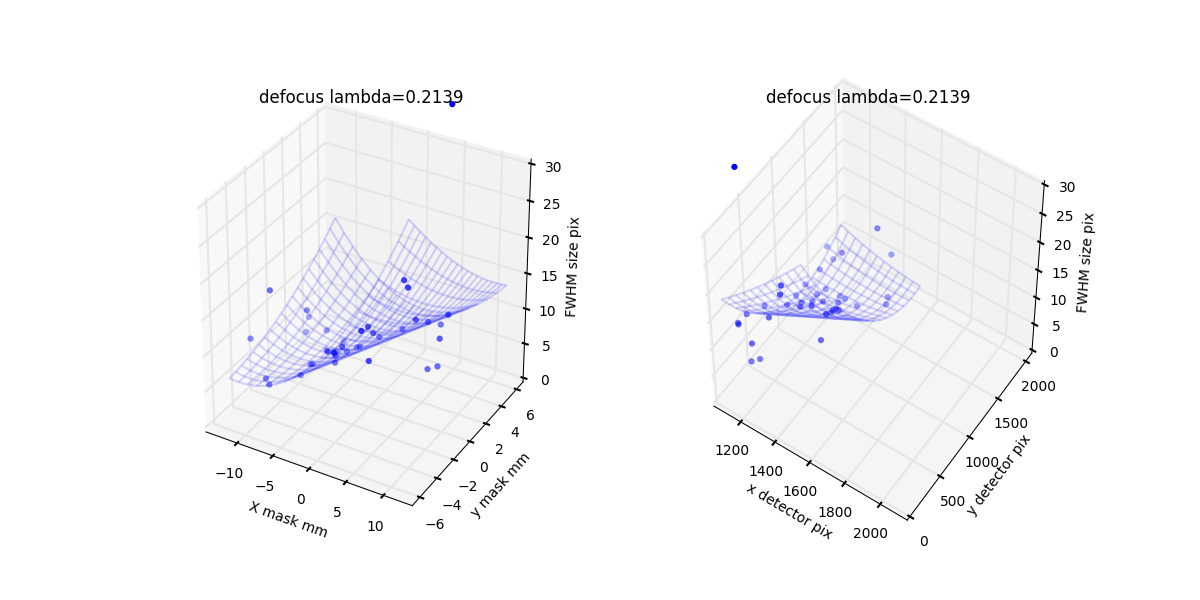

In [197]:
from Calibration_SW.focustest import *
estim_focus_tilted_mask(Tiltedmask, fit_yslope=False, plot=True)

## Tilted mask 05/25 pa3





      START IMAGE ANALYSIS 




reading parameters...
centre = None
date given :  25
To extract the sources: fwhm = [12.5, 15, 17], threshold = [15]
reading parameters...
Computing predicted location for science mask
Rotating the mask of 4 degree
Location of the sources predicted
Detection algorith is used without 66% ellipticity
fwhm = 12.5, T = 15, len = 148
Detection algorith is used without 66% ellipticity
fwhm = 15, T = 15, len = 149
Detection algorith is used without 66% ellipticity
fwhm = 17, T = 15, len = 127
Filtering out sources with peak flux below 200
Number of sources detected:  143
We fit the profile by the convolution of a box by a gaussian
Fitting in spectral direction
Fitting in spatial direction


<IPython.core.display.Javascript object>


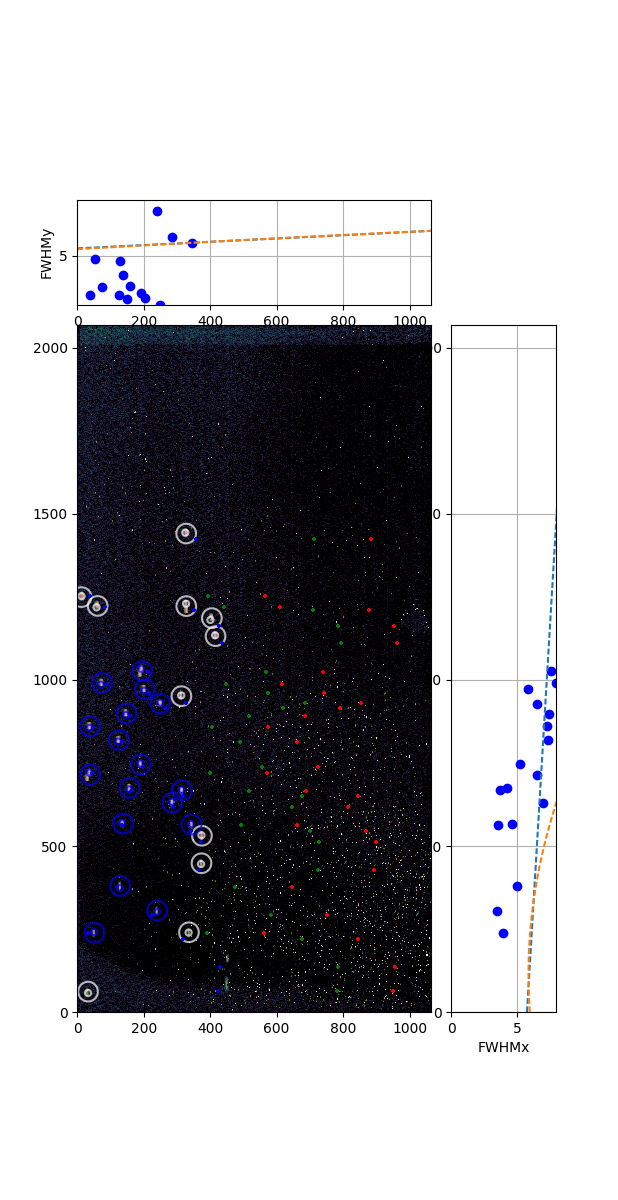

Table saved on:  /data/FireBall/FTS-06-2018/DetectorShim-20180525/image-423-442-tilted-3-stack_table.csv


In [191]:
from Calibration_SW.focustest import *
filename = '/data/FireBall/FTS-06-2018/DetectorShim-20180525/image-423-442-tilted-3-stack.fits'
Tiltedmask_pa3 = Focus(filename = filename, quick=False, figsize=12, reversex=True, date=25, windowing=True, mask='tilted', 
                   cloudpath=cloudpath, threshold=[15], fwhm=[12.5,15,17], peak_threshold=200, sources='slits', pa=3)

<IPython.core.display.Javascript object>


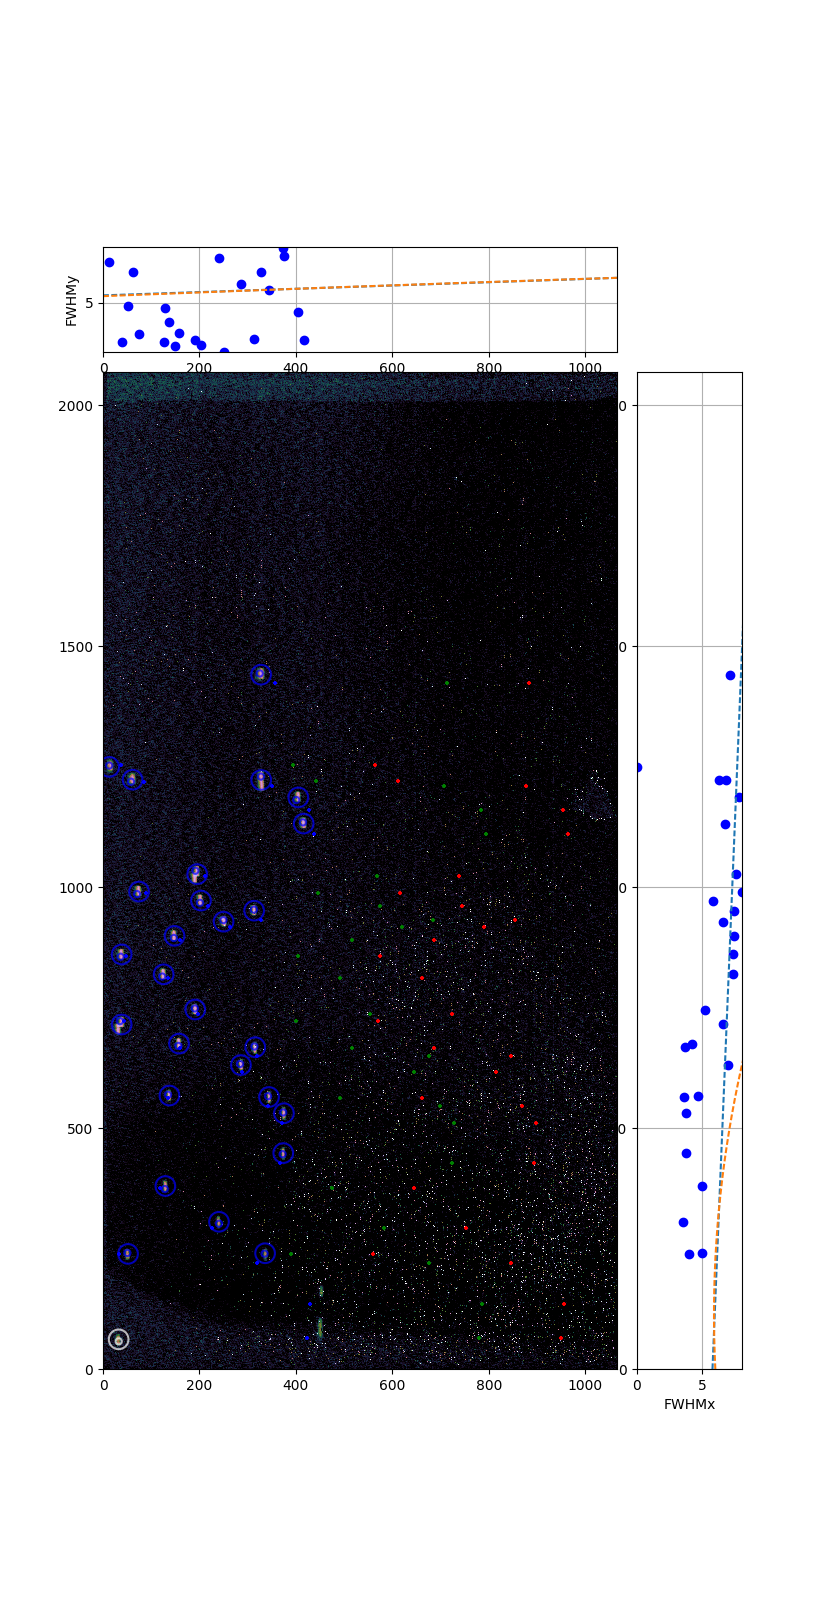

In [194]:
Tiltedmask_pa3.AsignWave2Spot(dist_min=50, dist_max=15)
Tiltedmask_pa3.plot_FWHM_det()

not enough spots at wavelength: 0.20261371
not enough spots at wavelength: 0.20626604
at wavelength: 0.21392365
maximum residual along x, y (in pixels): 1.10831686882, 4.93167847832


<IPython.core.display.Javascript object>


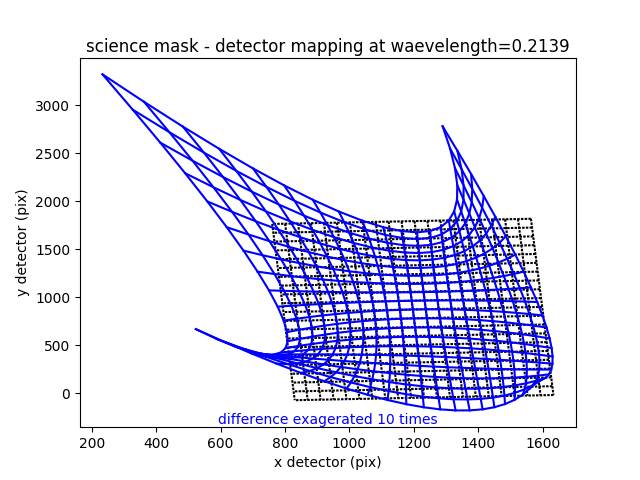

In [195]:
Tiltedmask_pa3.map_mask_detector(deg=[2,2])
Tiltedmask_pa3.plot_mapping()

Not enough spots at wavelength 0.20261371
Not enough spots at wavelength 0.20626604

        detector focus fitted at wavelength 0.21392365:
              offset: -2.90645311047  +-3.49709626816
              xslope: 14.0308601531  +-20.1387292243
              yslope: 0.0  +-0.0
              a: 4.63830954315  +-8.13412421381
              b: 8.64138908949  +-1.09030259407
              


<IPython.core.display.Javascript object>


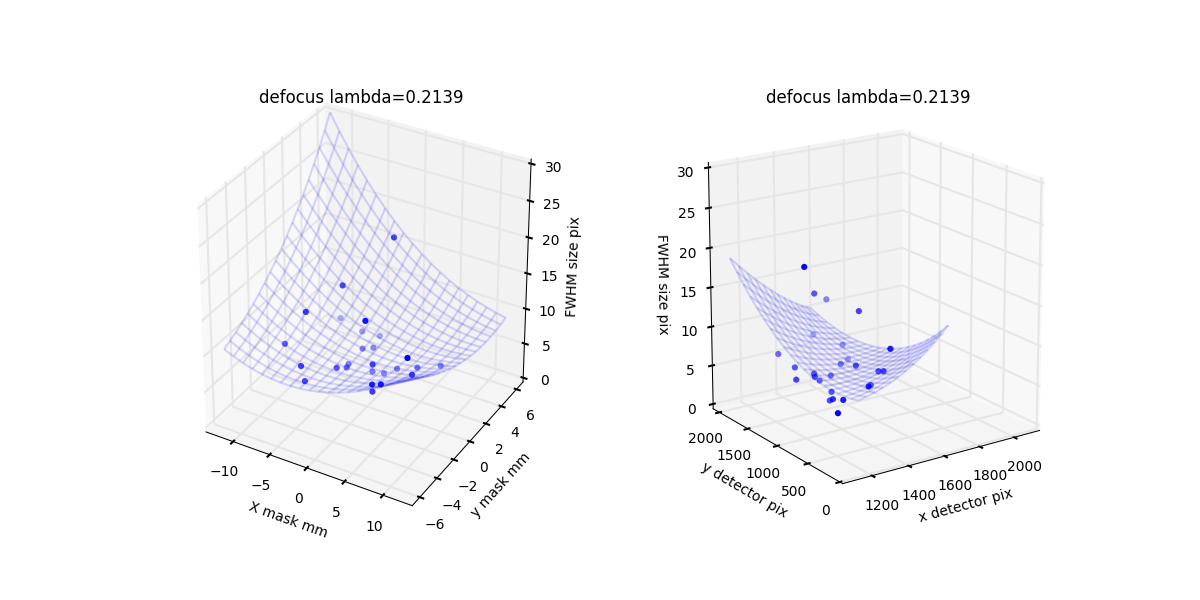

In [196]:
estim_focus_tilted_mask(Tiltedmask_pa3, fit_yslope=False, plot=True)

## Tilted mask 05/25 pa7

## Tilted mask 05/25 pa-5

## Tilted mask 05/25 pa-9

# Grid Mask 05/25





      START IMAGE ANALYSIS 




reading parameters...
centre = None
date given :  25
To extract the sources: fwhm = [12.5, 15, 17], threshold = [15]
reading parameters...
Computing predicted location for grid mask
Location of the sources predicted
fwhm = 12.5, T = 15, len = 1043
fwhm = 15, T = 15, len = 807
fwhm = 17, T = 15, len = 676
Filtering out sources with peak flux below 200
Number of sources detected:  272
We fit the profile by the convolution of a box by a gaussian
Fitting in spectral direction
Fitting in spatial direction


<IPython.core.display.Javascript object>


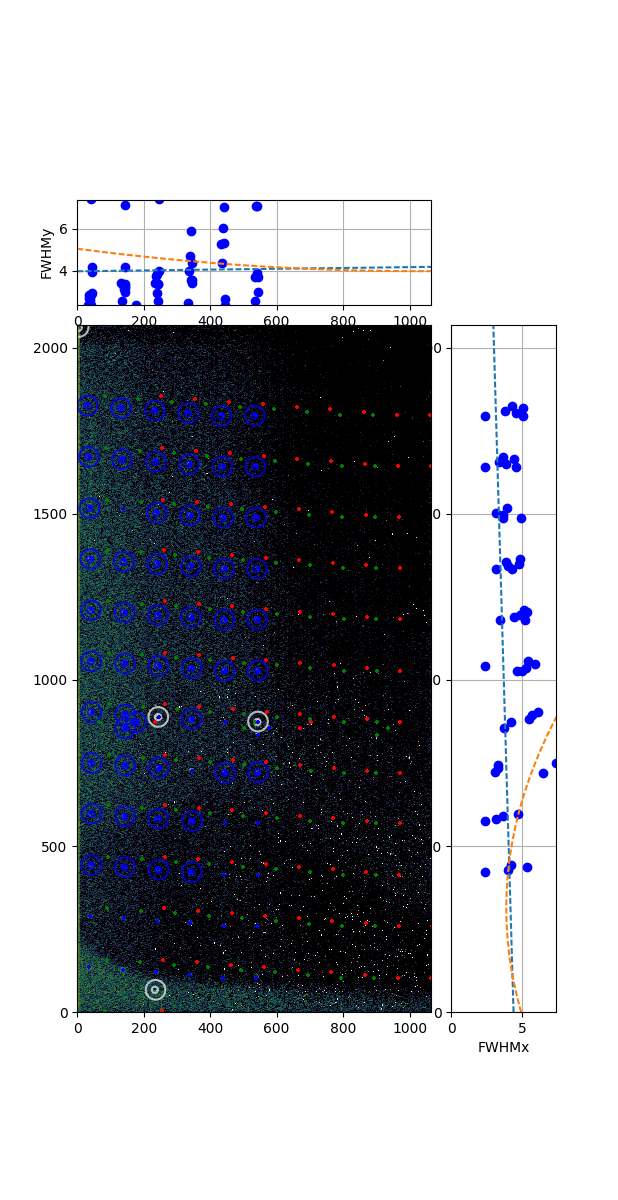

In [107]:
from Calibration_SW.focustest import *
filename = cloudpath + 'TestsFTS2018/AIT-Optical-FTS-201805/DetectorShim-20180525/image-343-362-grid-FRlamp-stack.fits'
GridMask = Focus(filename = filename, quick=False, figsize=12, windowing=True, reversex=True, date=25, mask='grid', cloudpath=cloudpath,
              threshold=[15], fwhm=[12.5,15,17], peak_threshold=200, sources='holes')

<IPython.core.display.Javascript object>


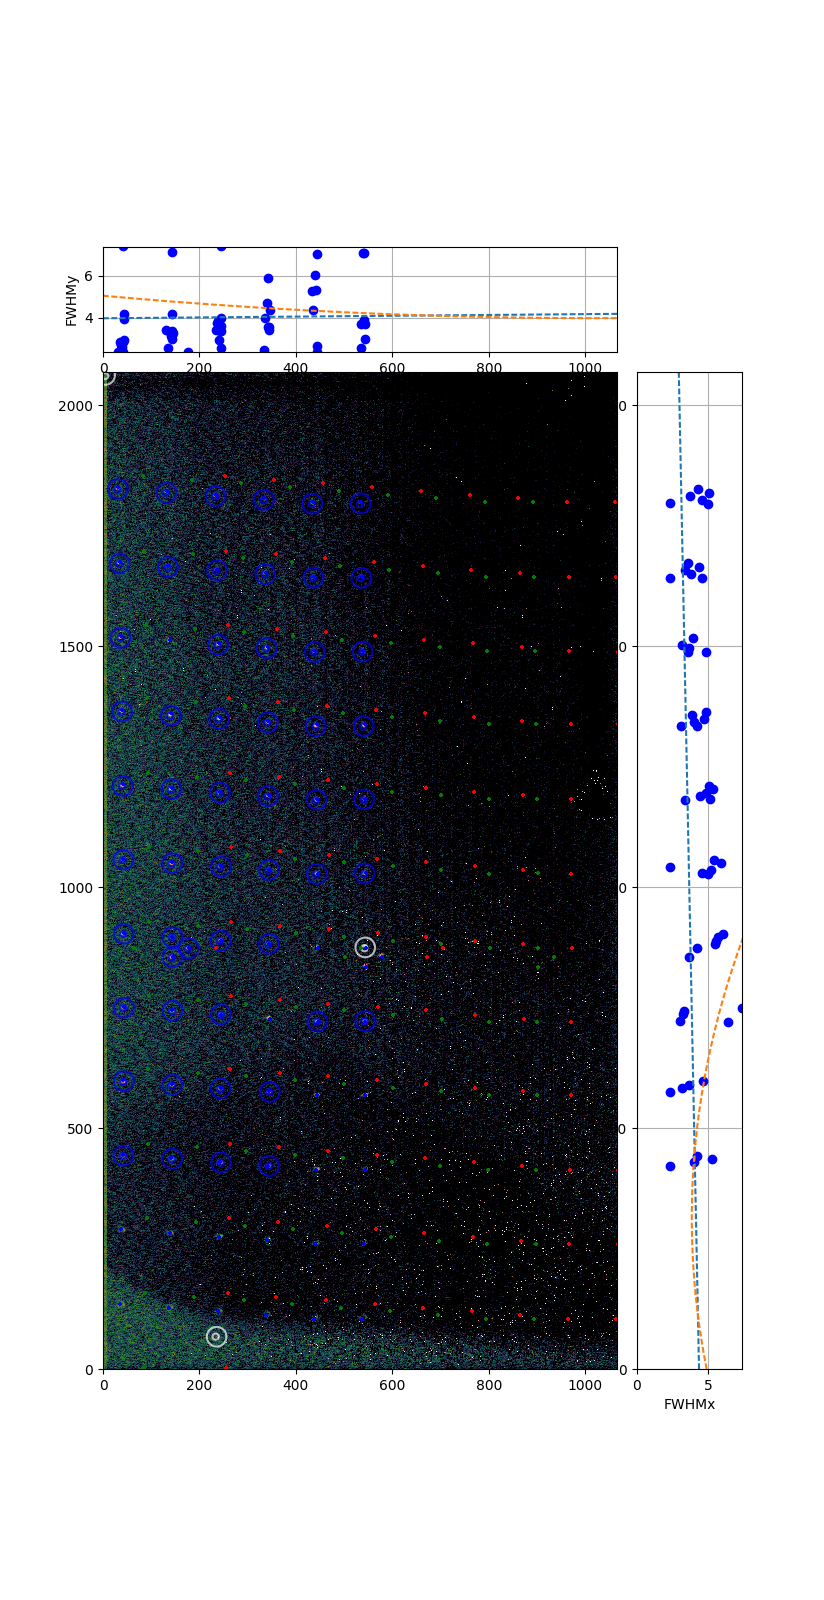

In [108]:
GridMask.AsignWave2Spot(dist_min=20, dist_max=15)
GridMask.plot_FWHM_det()

<IPython.core.display.Javascript object>


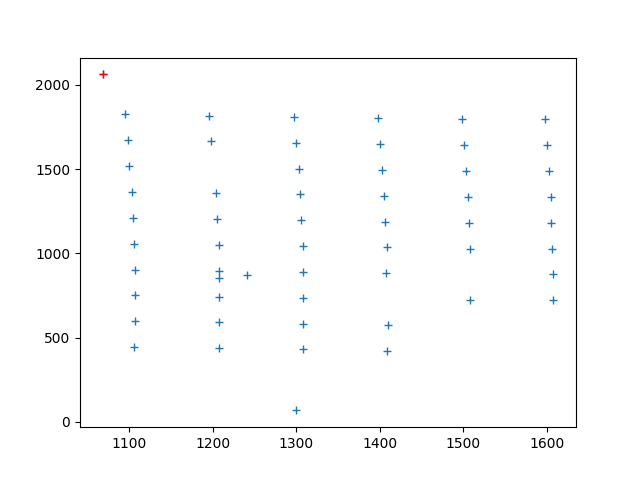

In [109]:
plt.figure()
plt.plot(GridMask.table['X_IMAGE'], GridMask.table['Y_IMAGE'],'+')
bad = (GridMask.table['FWHMx'] == 0) | (GridMask.table['FWHMy'] == 0)
plt.plot(GridMask.table[bad]['X_IMAGE'], GridMask.table[bad]['Y_IMAGE'],'r+')


not enough spots at wavelength: 0.20261371
not enough spots at wavelength: 0.20626604
at wavelength: 0.21392365
maximum residual along x, y (in pixels): 0.999912774937, 2.11729022425


<IPython.core.display.Javascript object>


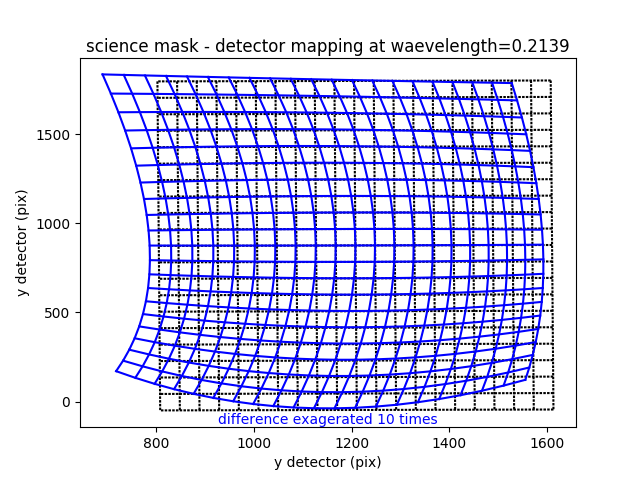

In [112]:
GridMask.map_mask_detector(deg=[2,2])
GridMask.plot_mapping()

In [114]:
map_cooefs = GridMask.mapping
dxdet_dxmask = map_cooefs[:,1,0,0]
dxdet_dymask = map_cooefs[:,0,1,0]
dydet_dxmask = map_cooefs[:,1,0,1]
dydet_dymask = map_cooefs[:,0,1,1]
J  = np.array([[dxdet_dxmask, dxdet_dymask],[dydet_dxmask, dydet_dymask]])
# convert det pix in mm
J *= 13*1E-3
print(J[...,0])
print(J[...,1])
print(J[...,2])

[[ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]]
[[ 0.00305262 -0.87242566]
 [-0.99936093 -0.00538083]]


### wrong focus parabola, since mask not tilted

Not enough spots at wavelength 0.20261371
Not enough spots at wavelength 0.20626604

        detector focus fitted at wavelength 0.21392365:
              offset: 2.89970003099  +-1.96491531664
              xslope: -14.3689102448  +-10.9023687982
              yslope: 0.0  +-0.0
              a: 1.34804388412  +-1.01557425027
              b: 5.60288683492  +-0.231252805666
              


<IPython.core.display.Javascript object>


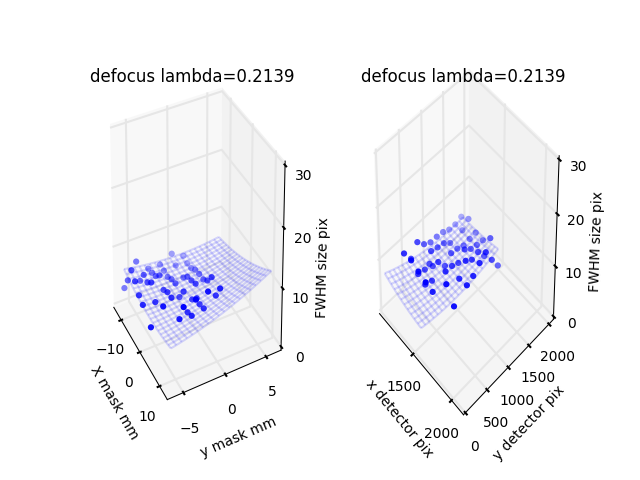

In [123]:
from Calibration_SW.focustest import *
estim_focus_tilted_mask(GridMask, fit_yslope=False, plot=True)